### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import pandas as pd

# File to Load (Remember to Change These)
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.  
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])

## District Summary

* Calculate the total number of schools

* Calculate the total number of students

* Calculate the total budget

* Calculate the average math score 

* Calculate the average reading score

* Calculate the percentage of students with a passing math score (70 or greater)

* Calculate the percentage of students with a passing reading score (70 or greater)

* Calculate the percentage of students who passed math **and** reading (% Overall Passing)

* Create a dataframe to hold the above results

* Optional: give the displayed data cleaner formatting

In [2]:
#show data frame first five rows
school_data_complete.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


In [3]:
#total number of school
total_schools = len(school_data_complete['school_name'].value_counts())

#total number of students
total_students = len(school_data_complete['Student ID'].value_counts())

#total budget
total_budget = sum(school_data_complete['budget'].unique())

#Average math score
ave_math_score= school_data_complete['math_score'].mean()

#avearge reading score
ave_reading_score = school_data_complete['reading_score'].mean()

#percentage of students with a passing math score (70 or greater) 
pass_math = len([i for i in school_data_complete['math_score'] if i >= 70])

#to calculate the percentage
percent_pass_math = pass_math/total_students

#percentage of students with a passing reading score (70 or greater)
pass_read = len([i for i in school_data_complete['reading_score'] if i >= 70])

#to calculate the percentage
percent_pass_read = pass_read/total_students

#percentage of students who passed math and reading (% Overall Passing)
passed_both = sum((school_data_complete['math_score']>=70) & (school_data_complete['reading_score']>=70))

#percent of student that passed both
percent_passed_both = passed_both/total_students

#round 
percent_pass_math = round(percent_pass_math, 6)
percent_pass_read = round(percent_pass_read, 6)
percent_passed_both = round(percent_passed_both, 6)

#Create a dataframe to hold the above results
summary_df = pd.DataFrame({"Number of schools": [total_schools],
"Number of Students": [total_students],
"Total Budget": [total_budget],
"Average Math Score": [ave_math_score],
"Average Reading Score": [ave_reading_score],
"% Passing Math": [percent_pass_math],
"% Passing Read": [percent_pass_read],
"% Overall Passing": [percent_passed_both]})

summary_df

,Number of schools,Number of Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Read,% Overall Passing
0,15,39170,24649428,78.985371,81.87784,0.749809,0.858055,0.651723


## School Summary

* Create an overview table that summarizes key metrics about each school, including:
  * School Name
  * School Type
  * Total Students
  * Total School Budget
  * Per Student Budget
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * % Overall Passing (The percentage of students that passed math **and** reading.)
  
* Create a dataframe to hold the above results
  

In [4]:
#school name and school type
school_name_type = school_data.set_index(['school_name'])['type']
#school_name_type = school_name_type.drop(['budget','School ID','size'], axis =1)


In [5]:
# Total Students for each school
num_students = school_data_complete['school_name'].value_counts()


In [6]:
#Total budget for each school
total_budget = school_data.groupby(['school_name'])['budget'].sum()
#total_budget = total_budget.drop(['School ID','size'], axis =1)


In [7]:
#Per Student Budget
per_student_budget = total_budget/num_students


In [8]:
#* Average Math Score per each school
ave_school_math = school_data_complete.groupby(['school_name'])['math_score'].mean()


In [9]:
#* Average Reading Score
ave_school_reading = school_data_complete.groupby(['school_name'])['reading_score'].mean()


In [10]:
#  % Passing Math of student for each school. student who got 70 or above in math
math_passing = school_data_complete[(school_data_complete['math_score'] >= 70)]
#group the the passing math score by school
math_passing = math_passing.groupby(['school_name'])['student_name'].count()
#calculate the percentage
school_math_passing = math_passing / num_students*100


In [11]:
#  % Passing reading of student for each school. student who got 70 or above in math
reading_passing = school_data_complete[(school_data_complete['reading_score'] >= 70)]
#group the the passing math score by school
reading_passing = reading_passing.groupby(['school_name'])['student_name'].count()
#calculate the percentage
school_reading_passing = reading_passing / num_students*100



In [25]:
#* % Overall Passing (The percentage of students that passed math **and** reading.)
overall_passing = school_math_passing + school_reading_passing
#to calculate the rate
passing_rate =overall_passing/2


In [26]:
#* Create a dataframe to hold the above results
school_summary_df = pd.DataFrame({
    "School Type": school_name_type,
    "Total Students": num_students,
    "Total School Budget": total_budget,
    "Per Student Budget": per_student_budget,
    "Average Math Score": ave_school_math,
    "Average Reading Score": ave_school_reading,
    "% Passing Math": school_math_passing,
    "% Passing Reading": school_reading_passing,
    "% Overall Passing": passing_rate
})

school_summary_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,66.680064,81.933280,74.306672
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,95.586652
Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,65.988471,80.739234,73.363852
Ford High School,District,2739,1763916,644.0,77.102592,80.746258,68.309602,79.299014,73.804308
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,93.392371,97.138965,95.265668
Hernandez High School,District,4635,3022020,652.0,77.289752,80.934412,66.752967,80.862999,73.807983
Holden High School,Charter,427,248087,581.0,83.803279,83.814988,92.505855,96.252927,94.379391
Huang High School,District,2917,1910635,655.0,76.629414,81.182722,65.683922,81.316421,73.500171
Johnson High School,District,4761,3094650,650.0,77.072464,80.966394,66.057551,81.222432,73.639992
Pena High School,Charter,962,585858,609.0,83.839917,84.044699,94.594595,95.945946,95.270270


## Top Performing Schools (By % Overall Passing)

* Sort and display the top five performing schools by % overall passing.

In [30]:
Top_performing_schools = school_summary_df.sort_values("% Overall Passing", 
                                                       ascending=False)
Top_performing_schools.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,95.586652
Thomas High School,Charter,1635,1043130,638.0,83.418349,83.848930,93.272171,97.308869,95.290520
Pena High School,Charter,962,585858,609.0,83.839917,84.044699,94.594595,95.945946,95.270270
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,93.392371,97.138965,95.265668
Wilson High School,Charter,2283,1319574,578.0,83.274201,83.989488,93.867718,96.539641,95.203679


## Bottom Performing Schools (By % Overall Passing)

* Sort and display the five worst-performing schools by % overall passing.

In [29]:
Buttom_performing_school = school_summary_df.sort_values("% Overall Passing", 
                                                         ascending=True)
Buttom_performing_school.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Rodriguez High School,District,3999,2547363,637.0,76.842711,80.744686,66.366592,80.220055,73.293323
Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,65.988471,80.739234,73.363852
Huang High School,District,2917,1910635,655.0,76.629414,81.182722,65.683922,81.316421,73.500171
Johnson High School,District,4761,3094650,650.0,77.072464,80.966394,66.057551,81.222432,73.639992
Ford High School,District,2739,1763916,644.0,77.102592,80.746258,68.309602,79.299014,73.804308


## Math Scores by Grade

* Create a table that lists the average Reading Score for students of each grade level (9th, 10th, 11th, 12th) at each school.

  * Create a pandas series for each grade. Hint: use a conditional statement.
  
  * Group each series by school
  
  * Combine the series into a dataframe
  
  * Optional: give the displayed data cleaner formatting

In [32]:
#* Group each series by school
  
#Combine the series into a dataframe

school_9th_grade = school_data_complete[school_data_complete['grade'] == 
                                        '9th'].groupby('school_name')['math_score'].mean()
school_10th_grade = school_data_complete[school_data_complete['grade'] == 
                                         '10th'].groupby('school_name')['math_score'].mean()
school_11th_grade = school_data_complete[school_data_complete['grade'] == 
                                         '11th'].groupby('school_name')['math_score'].mean()
school_12th_grade = school_data_complete[school_data_complete['grade'] == 
                                         '12th'].groupby('school_name')['math_score'].mean()
                                                                                      

In [21]:
#Combine the series into a dataframe
Grade_math_score_df = pd.DataFrame({
    '9th': school_9th_grade,
    '10th': school_10th_grade,
    '11th': school_11th_grade,
    '12th': school_12th_grade})

Grade_math_score_df
    

,9th,10th,11th,12th
school_name,,,,
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248


## Reading Score by Grade 

* Perform the same operations as above for reading scores

In [31]:
#* Group each series by school
  
#Combine the series into a dataframe

school_9th_grade = school_data_complete[school_data_complete['grade'] == 
                                        '9th'].groupby('school_name')['reading_score'].mean()
school_10th_grade = school_data_complete[school_data_complete['grade'] == 
                                         '10th'].groupby('school_name')['reading_score'].mean()
school_11th_grade = school_data_complete[school_data_complete['grade'] == 
                                         '11th'].groupby('school_name')['reading_score'].mean()
school_12th_grade = school_data_complete[school_data_complete['grade'] == 
                                         '12th'].groupby('school_name')['reading_score'].mean()
                   

In [23]:
#Combine the series into a dataframe
Grade_reading_score_df = pd.DataFrame({
    '9th': school_9th_grade,
    '10th': school_10th_grade,
    '11th': school_11th_grade,
    '12th': school_12th_grade})

Grade_reading_score_df
    

,9th,10th,11th,12th
school_name,,,,
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564


## Scores by School Spending

* Create a table that breaks down school performances based on average Spending Ranges (Per Student). Use 4 reasonable bins to group school spending. Include in the table each of the following:
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)

## Scores by School Size

* Perform the same operations as above, based on school size.

## Scores by School Type

* Perform the same operations as above, based on school type

### final considerations

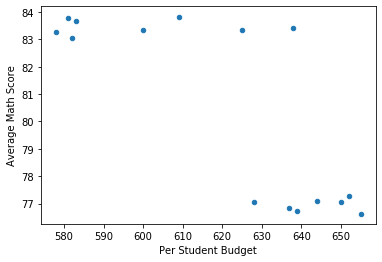

In [27]:
import matplotlib.pyplot as plt 
%matplotlib inline
school_summary_df.plot('Per Student Budget',
                       'Average Math Score',
                       kind="")
plt.show()